In [701]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
import random

In [702]:
#Generate a dataset for testing k-means 
true_data, true_labels = make_blobs(n_samples=50, centers=3)
true_data = StandardScaler().fit_transform(true_data)

In [703]:
print(true_data)

[[-1.24717355 -0.60560766]
 [ 0.1833969  -0.72915228]
 [-1.22741716 -0.27462647]
 [ 1.1038177   1.32208155]
 [ 0.09275656 -0.71619296]
 [-1.13585283 -0.46256036]
 [-1.47188901 -0.640495  ]
 [-1.30308373 -0.71061051]
 [-1.26911354 -0.65769729]
 [ 0.21214017 -0.65728425]
 [-1.25386249 -0.45579055]
 [ 0.39516359 -0.91274537]
 [-1.32146014 -0.68018737]
 [ 1.21587562  1.55912281]
 [ 0.34870471 -0.80601829]
 [ 0.05612763 -0.9265508 ]
 [ 1.05729624  1.48074753]
 [ 1.19271772  1.46404578]
 [ 0.2565654  -0.86103723]
 [ 0.26341489 -0.89737772]
 [-1.33514747 -0.44421694]
 [ 0.83776636  1.42349632]
 [ 0.08612962 -0.63382515]
 [ 0.41229438 -0.73308608]
 [ 1.13823061  1.55175786]
 [-1.30319985 -0.68192839]
 [ 1.23844057  1.53816605]
 [ 0.17105197 -0.88850053]
 [ 1.3532289   1.32547726]
 [ 0.19528408 -0.73647617]
 [-1.25703257 -0.51805574]
 [ 0.19126281 -0.97779431]
 [ 1.14321041  1.66841775]
 [ 1.21105422  1.60913572]
 [ 0.41384767 -0.83431299]
 [ 0.23423195 -0.75694676]
 [ 1.13011736  1.25665206]
 

In [704]:
print(true_data.shape)

(50, 2)


In [705]:
print(true_labels)

[1 0 1 2 0 1 1 1 1 0 1 0 1 2 0 0 2 2 0 0 1 2 0 0 2 1 2 0 2 0 1 0 2 2 0 0 2
 0 2 1 1 0 2 1 1 1 2 1 2 2]


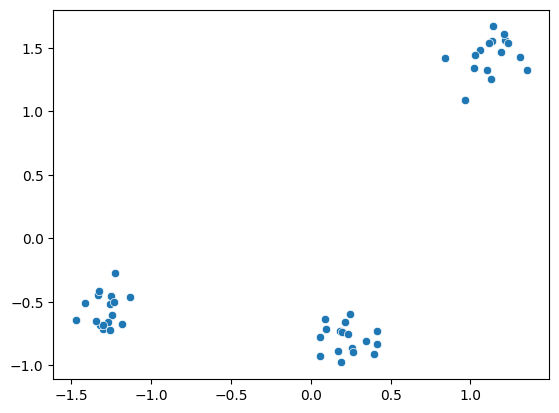

In [706]:
#Visualize the data
sns.scatterplot(x=[data[0] for data in true_data], y=[data[1] for data in true_data])
plt.show()

## K-Means algorithm

In [707]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

In [708]:
class kmeans:

    def __init__(self, no_of_clusters, max_iters):
        self.no_of_clusters = no_of_clusters
        self.max_iters = max_iters

        self.clusters = [[] for i in range(self.no_of_clusters)]
        self.centroids = []

    #Find the centroid closest to a data point    
    def find_nearest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    #Add a data point to the nearest centroid
    def assign_to_nearest_centroid(self, centroids):
        clusters = [[] for i in range(self.no_of_clusters)]
        for idx, sample in enumerate(self.x):
            nearest_centroid = self.find_nearest_centroid(sample, centroids)
            clusters[nearest_centroid].append(idx)
        return clusters

    #Update the value of the centroids (mean of coordinates of points in each cluster)
    def update_centroids(self, clusters):
        centroids = np.zeros((self.no_of_clusters, self.no_of_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.x[cluster], axis=0)
            centroids[cluster_index] = cluster_mean
        return centroids

    #Check if the new centroid coordiates are the same as the previous coordinates
    def check_for_convergence(self, current_centroids, centroids):
        distances = [euclidean_distance(current_centroids[i], centroids[i]) for i in range(self.no_of_clusters)]
        return sum(distances) == 0

    #Return the community structure
    def get_cluster_labels(self, clusters):
        labels = np.empty(self.no_of_samples)
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels


    def predict(self,x):
        self.x = x
        self.no_of_samples, self.no_of_features = x.shape
        
        #Initialize cluster centers randomly
        random_sample_indices = np.random.choice(self.no_of_samples, self.no_of_clusters, replace=False)
        self.centroids = [self.x[idx] for idx in random_sample_indices]

        #Modify cluster centers
        for i in range(self.max_iters):

            #assign points to clusters
            self.clusters = self.assign_to_nearest_centroid(self.centroids)

            #update centroid coordinatess
            current_centroids = self.centroids
            self.centroids = self.update_centroids(self.clusters)
            
            #check if the new and old centroid coordinates are the same
            if self.check_for_convergence(current_centroids, self.centroids):
                break


        #Finally, return the recovered community structure
        return self.get_cluster_labels(self.clusters)

In [709]:
#Test the kmeans class
##1. __init__()
kmeans_test = kmeans(3,10000)
print(kmeans_test.clusters)
print(kmeans_test.centroids)

##2. predict()
predicted_labels = kmeans_test.predict(true_data)

[[], [], []]
[]


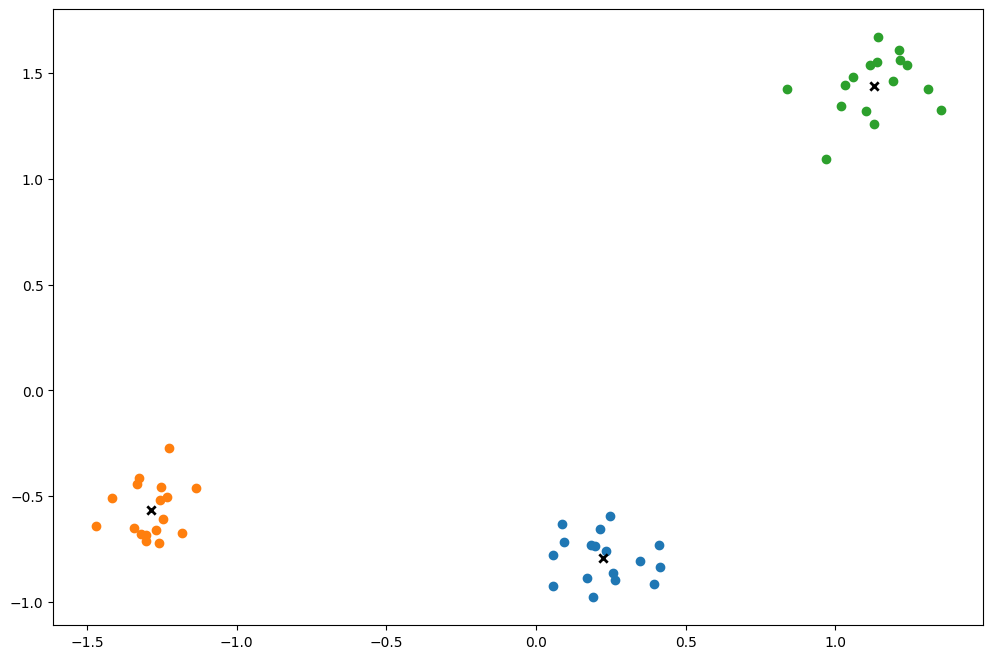

In [710]:
#Visualize the results
#Function credits - https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
fig, ax = plt.subplots(figsize=(12, 8))
for i, index in enumerate(kmeans_test.clusters):
    point = kmeans_test.x[index].T
    ax.scatter(*point)

for point in kmeans_test.centroids:
        ax.scatter(*point, marker="x", color='black', linewidth=2)

plt.show()

In [711]:
#Use NMI to compare the results
normalized_mutual_info_score(true_labels, predicted_labels)

1.0